<a href="https://colab.research.google.com/github/Iguta/ZTM-DeepLearningWithPyTorch/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Pytorch
import torch
from torch import nn

#import torchdivision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [2]:
#device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#getting the datasets -> Fahion MNIST - Modofied National Institute of Standards and Technology
train_data = datasets.FashionMNIST(
    root ="data", #where to download the data
    train=True,
    download=True,
    transform=ToTensor(), #how to transform the data
    target_transform=None #how we want to transform the labels
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.9MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
#see the first training example
type(train_data)
img, label = train_data[0]
print(f"Image Shape: {img.shape} => [color_channel, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) => [color_channel, height, width]
Image label: Ankle boot


In [7]:
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### Visualizing Random Samples of our Data

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

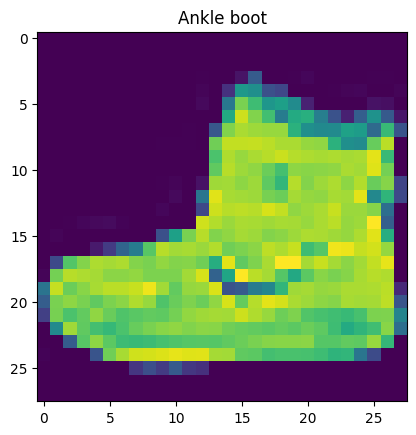

In [10]:
print(img.shape)
plt.imshow(img.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

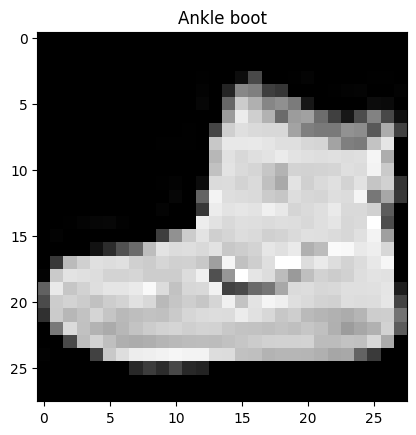

In [11]:
#plot in gray scale
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])

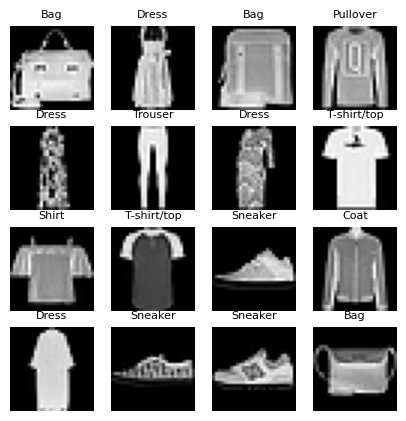

In [12]:
#plotting more samples
fig = plt.figure(figsize=(5, 5))
rows, cols = 4, 4
for i in range(1, rows * cols +1):
  rand_indx = torch.randint(0, len(train_data), size=[1]).item()
  fig.add_subplot(rows, cols, i)
  img, label = train_data[rand_indx]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(class_names[label], {"fontsize":8})


### Using DataLoader to create the batches

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)
test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,

)

In [14]:
print(f"Number of Train Batches: {len(train_data_loader)}")
print(f"Number of Test Batches: {len(test_data_loader)}")

Number of Train Batches: 1875
Number of Test Batches: 313


In [15]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x787b90036910>,
 <torch.utils.data.dataloader.DataLoader at 0x787b90492410>)

In [16]:
#getting samples from the data loader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
len(train_features_batch)

32

Image Size: torch.Size([1, 28, 28])


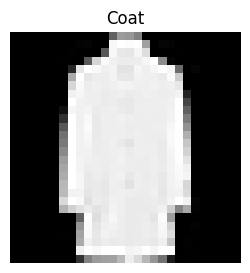

In [18]:
#show a sample
torch.manual_seed(100)
plt.figure(figsize=(3, 3))
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image Size: {img.shape}")

###Baseline Model


In [19]:
#create a flatten layer
flatten_model = nn.Flatten()
x = train_features_batch[0]
print(f"Shape before flattening:  {x.shape} -> [color_channel, height, width]")
output = flatten_model(x)
print(f"Shape after flattening:  {output.shape} -> [color_channl, height * width]")

Shape before flattening:  torch.Size([1, 28, 28]) -> [color_channel, height, width]
Shape after flattening:  torch.Size([1, 784]) -> [color_channl, height * width]


In [20]:
# output

In [21]:
from torch import nn
class FashionMNIST(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int
               ):
    super().__init__()
    self.layers = nn.Sequential(
        #flatten our data first
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )
  def forward(self, x):
    return self.layers(x)



In [22]:
torch.manual_seed(42)
model = FashionMNIST(
    input_shape = 28 *28, #image shape
    hidden_units = 10, #number of units in the hidden layer
    output_shape=len(class_names)#number of classes
).to("cpu")

In [23]:
model

FashionMNIST(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1, 1, 28,28])
model(dummy_x).shape

torch.Size([1, 10])

In [25]:
model.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,


### Loss and Optimizer

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr = 0.01
    )

In [27]:
def accuracy_fn(y_true:torch.Tensor, y_pred:torch.Tensor):
  # print(y_true.shape, y_pred.shape)
  correct =  torch.eq(y_pred, y_true).sum().item()
  # print(correct)
  # print(len(y_pred))
  acc = correct / len(y_pred) * 100
  return acc

In [28]:
#function to time our Modelling code
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """
  Print difference between start and end time
  Description:
  Args start, end
  """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")

In [29]:
start = timer()
#some codde
end = timer()
print_train_time(start, end, "cpu")

Train time on cpu: 0.000 seconds


### Creating a training loop and training a model on batches of data
- Loop through epochs
- Loop through training batches, perform training steps, calculate the train loss per batch
- Loop through testing batches, perform testing steps, calculate the test loss per batch
- Print what is happenning
- Check time the model takes to run


In [30]:
from tqdm.auto import tqdm
def train_model():
  #number of epochs
  epochs = 5

  for epoch in tqdm(range(epochs)):
    #training loss
    train_loss = 0

    #loop for the batches
    for batch, (X, y) in enumerate(train_data_loader):
      model.train()

      #forward pass
      y_pred = model(X)

      #training loss
      loss =  loss_fn(y_pred, y)

      #add training loss
      train_loss += loss.item() #accumulate train loss

      #optimizer zero grad
      optimizer.zero_grad()

      #back propagation
      loss.backward()

      #optimize the gradients -> update our model parameters every batch
      optimizer.step()

      if batch %400 ==0:
        print(f"Looked at {batch * len(X)} / {len(train_data_loader.dataset)} samples")
    #divide total train loss by length of train dataloader
    train_loss /= len(train_data_loader)


    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
      for X_test, y_test in test_data_loader:
        #forward pass
        test_pred = model(X_test)

        #calculate the loss
        test_loss += loss_fn(test_pred, y_test).item()

        #calculate accuracy
        test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

      #calculate the test loss average per batch
      test_loss /= len(test_data_loader)

      #calculate the test acc average per batch
      test_acc /= len(test_data_loader)

    #print what is happening
    print(f"\nTrain Loss: {train_loss:.4f}  | Test loss: {test_loss:.4f}, Test Acc:{test_acc:.4f}")



In [31]:
start = timer()
train_model()
end = timer()
total_train_time = print_train_time(start, end)

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.9078  | Test loss: 0.6335, Test Acc:78.2149
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.5570  | Test loss: 0.5547, Test Acc:80.6609
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.5019  | Test loss: 0.5236, Test Acc:81.5495
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4760  | Test loss: 0.4982, Test Acc:82.6478
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 

### Make Predictions

In [81]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device):
  """
  Returns a dictionary containing the results model predicting on data loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #make predictions
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      #accumulate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    #average loss and accuracy
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


In [33]:
model_results = eval_model(model,
                           test_data_loader,
                           loss_fn,
                           accuracy_fn,
                           device="cpu"
                           )
model_results

{'model_name': 'FashionMNIST',
 'model_loss': 0.48645320534706116,
 'model_acc': 83.18690095846645}

In [34]:
next(iter(model.parameters())).device

device(type='cpu')

In [35]:
!nvidia-smi

Wed Aug  6 16:17:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   36C    P8             16W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [36]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Imroved Model - with non-linearity

In [37]:
class FashionMNISTV2(nn.Module):
  def __init__(self, input_features: int,
               hidden_units: int,
               output_features: len(class_names)):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(), #flatten the inputs into a single vector
        nn.Linear(input_features, hidden_units),
        nn.ReLU(), #add some non-linearity
        nn.Linear(hidden_units, output_features),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layers(x)

In [38]:
modelV2 = FashionMNISTV2(28 * 28, 10, 10).to(device)
modelV2

FashionMNISTV2(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=modelV2.parameters(),
    lr = 0.1
    )

### Training and Testing Loop
- `training_step()`
- `testing_step()`

In [40]:
# import numpy as np
# train_loss, test_loss, train_acc, test_acc = 0, 0, 0, 0
# test_loss

In [41]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """
  Performs a training with the provided model trying to learn on data loader
  """
  #batch loop
  train_loss, train_acc = 0,0

  #set model.train() -> so as to be for every epoch
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    #put data to target device
    X, y = X.to(device), y.to(device)

    #forward pass
    y_pred = model(X)

    #evaluate train loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #evaluate train_accuracy per batch
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    #zero grad
    optimizer.zero_grad()

    #backward propagation
    loss.backward()

    #optimize gradients
    optimizer.step()

  #average training accuracy
  train_acc /= len(data_loader)
  #average training loss
  train_loss /=len(data_loader)

  #visualize training loss and training accuracy
  print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")


In [42]:
def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:nn.Module,
              accuracy_fn,
              device:torch.device = device
              ):
  #test batch loop
  test_acc, test_loss = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      #forward pass
      y_pred = model(X)

      #test loss
      test_loss += loss_fn(y_pred, y)
      #test accuracy
      test_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    #average test loss, and test accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  #visualize the results
  print(f"Test Loss: {test_loss:.4f} Test Acc: {test_acc:.2f}%\n")

In [43]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
epochs = 3

start_training_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  #do the training
  train_step(modelV2, train_data_loader, loss_fn, optimizer, accuracy_fn, device)
  #do the testing
  test_step(modelV2, test_data_loader, loss_fn, accuracy_fn, device)

end_training_time = timer()
print_train_time(start_training_time, end_training_time)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.3611 | Train Accuracy: 52.24%
Test Loss: 1.2949 Test Acc: 53.13%

Epoch: 1
---------
Train Loss: 1.2396 | Train Accuracy: 57.25%
Test Loss: 1.2840 Test Acc: 54.77%

Epoch: 2
---------
Train Loss: 1.2168 | Train Accuracy: 58.59%
Test Loss: 1.2260 Test Acc: 59.00%

Train time on None: 31.561 seconds


In [44]:
model_results

{'model_name': 'FashionMNIST',
 'model_loss': 0.48645320534706116,
 'model_acc': 83.18690095846645}

In [45]:
device

'cuda'

In [46]:
#improved model results
improved_model_results = eval_model(modelV2, test_data_loader, loss_fn, accuracy_fn, device)
improved_model_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 1.22601318359375,
 'model_acc': 58.995607028753994}

### Model 3 -> Building a Convoluted Neural Network

In [47]:
class FashionMNISTV3(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, out_features=output_shape),
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"shape after convolution block 1 {x.shape}")
    x = self.conv_block_2(x)
    # print(f"shape after convolution block 2 {x.shape}")
    x = self.classifier(x)
    # print(f"shape after classifier {x.shape}")
    return x


In [48]:
torch.manual_seed(42)
model3 = FashionMNISTV3(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

In [49]:
model3

FashionMNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch {images.shape}")
print(f"Single image batch {test_image.shape}")
# print(f"Test image:\n {test_image}")

Image batch torch.Size([32, 3, 64, 64])
Single image batch torch.Size([3, 64, 64])


In [51]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [52]:
img.shape

torch.Size([1, 28, 28])

In [53]:
tensor = torch.randn(size=[2, 10, 7, 7])
flatten_model = nn.Flatten()
flattened_vector = flatten_model(tensor, )
flattened_vector.shape

torch.Size([2, 490])

In [54]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
img_output = model3(img.unsqueeze(dim=0).to(device))
print(img_output)
print(img_output.shape)
label = img_output.softmax(dim=0).argmax()
class_names[label]

tensor([[ 0.0401, -0.0699,  0.0551, -0.0346, -0.0049,  0.0172, -0.0012, -0.0179,
          0.0271,  0.0047]], device='cuda:0', grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


'T-shirt/top'

###Set up loss function and optimizer & eval metrics

In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model3.parameters(), lr=0.1)

In [57]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.3843, 0.6118, 0.5922, 0.5059,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0118, 0.0157, 0.0000, 0.0000, 0.9725, 1.0000, 0.9882, 1.0000,
          0.6275, 0.0000, 0.0196, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
          0.0000, 0.0000, 0.0000, 0.3412, 0.9725, 0.9098, 0.9020, 0.9608,
          0.8667, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
          0.0000, 0.3490, 0.8353, 0.9765, 0.9412, 0.9255, 0.9255, 0.9294,
          0.9647, 1.0000, 0.5490, 0.0196, 0.0000, 0.0000,

In [58]:
##training
from tqdm.auto import tqdm
from timeit import default_timer as timer

epochs = 3
start_time = timer()
for epoch in tqdm(range(epochs)):
  if epoch%10 ==0:
    print(f"Epoch: {epoch} ------\n")
  #call training_step()
  train_step(model3, train_data_loader, loss_fn, optimizer, accuracy_fn, device)
  #call test step()
  test_step(model3, test_data_loader, loss_fn, accuracy_fn, device)
end_time = timer()
print_train_time(start_time, end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ------

Train Loss: 0.6079 | Train Accuracy: 77.84%
Test Loss: 0.4272 Test Acc: 84.81%

Train Loss: 0.3754 | Train Accuracy: 86.55%
Test Loss: 0.3989 Test Acc: 85.24%

Train Loss: 0.3364 | Train Accuracy: 87.72%
Test Loss: 0.3594 Test Acc: 87.02%

Train time on None: 39.164 seconds


In [59]:
model3_results = eval_model(model3, test_data_loader, loss_fn, accuracy_fn, device)
model3_results

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.3594008982181549,
 'model_acc': 87.02076677316293}

In [60]:
#confusion matrix
from tqdm.auto import tqdm

y_preds= []
y_true=[]
model3.eval()
with torch.inference_mode():
  for X, y in tqdm(test_data_loader, desc="Making Predictions"):
    X, y = X.to(device), y.to(device)

    #forward pass
    y_logit = model3(X)

    #turn logits into labels
    y_pred =  torch.argmax(y_logit, dim=1)

    #put predictions on cpu
    y_preds.append(y_pred.cpu())
    y_true.append(y.cpu())

  y_pred_tensor = torch.cat(y_preds)
  y_true_tensor = torch.cat(y_true)

  print(y_pred_tensor)



Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])


In [61]:
len(y_pred_tensor)
len(y_true_tensor)

10000

In [62]:
!pip install torchmetrics -q mlxtend -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00


In [63]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

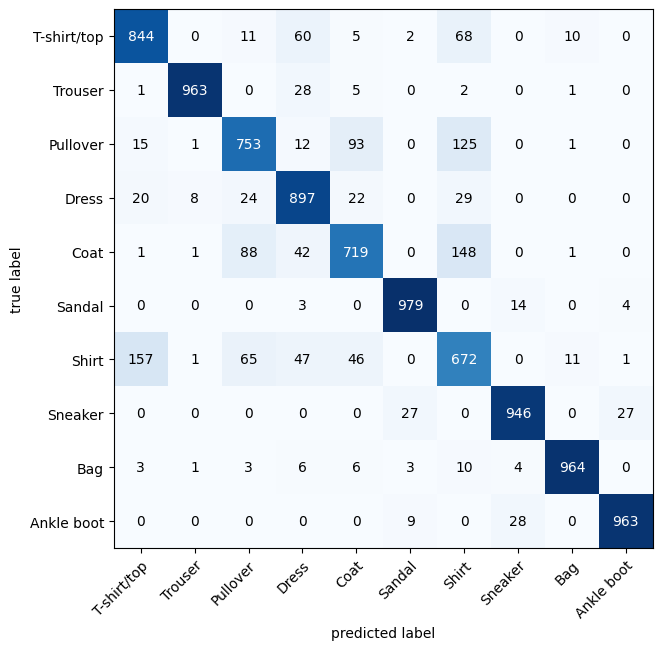

In [66]:
from torchmetrics.classification import MulticlassConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cm = MulticlassConfusionMatrix(num_classes=len(class_names))
cm_tensor =  cm(y_pred_tensor, test_data.targets)

#plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))


### Saving and Loading our best model


In [71]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#create model save
MODEL_NAME = "03_TinyVGG.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model3.state_dict(), f=MODEL_SAVE_PATH)



Saving the model to: models/03_TinyVGG.pth


### Load the model

In [75]:
from operator import indexOf
#create a new instance of the model
loaded_model = FashionMNISTV3(input_shape=1, hidden_units=10, output_shape=len(class_names))

#load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#send to the target device
loaded_model.to(device)

FashionMNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [77]:
model3_results

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.3594008982181549,
 'model_acc': 87.02076677316293}

In [82]:
#evaluate loaded model
model3_loaded_results = eval_model(loaded_model, test_data_loader, loss_fn, accuracy_fn, device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [83]:
model3_loaded_results

{'model_name': 'FashionMNISTV3',
 'model_loss': 0.3594008982181549,
 'model_acc': 87.02076677316293}